# Homework 1
## Soroush Khadem

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import math

### Problem 4: Firing rate of the LIF model

In [2]:
# define the constants used
taum = 10   # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
uth = 1     # spiking threshold (mV)

In [3]:
def calcSpikeTime(current):
    return -taum*math.log(1 - ((uth - urest)/(R*current)) ,math.e)

In [4]:
# using solution to calculate Icrit:
Icrit = (uth - urest) / R
step = 0.01
currents = np.arange(Icrit + step, 10, step)
input_times = []

for current in currents:
    input_times.append(calcSpikeTime(current))
input_times = np.array(input_times)



<IPython.core.display.Javascript object>


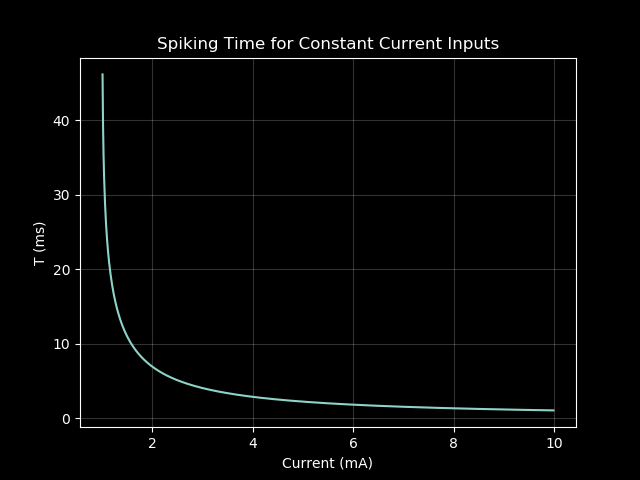

In [5]:
fig = plt.figure()       
plt.grid(True, alpha=0.2)
plt.plot(currents, input_times)
plt.title('Spiking Time for Constant Current Inputs')
plt.xlabel('Current (mA)')
plt.ylabel('T (ms)')
plt.show()

<IPython.core.display.Javascript object>


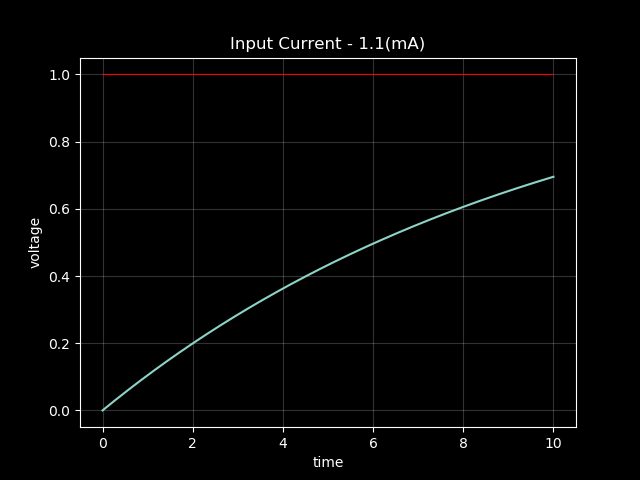

<IPython.core.display.Javascript object>


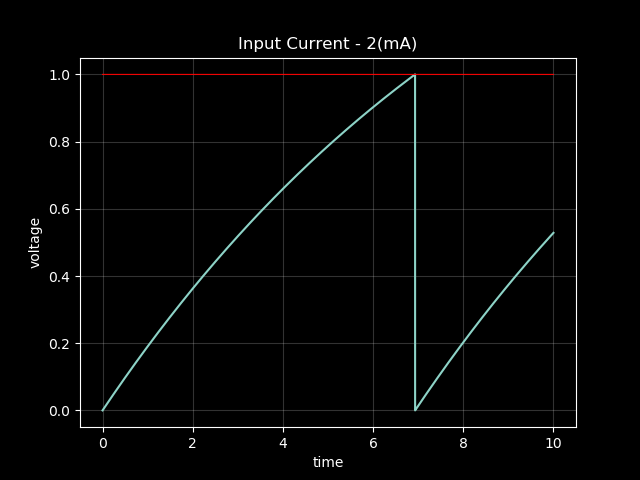

<IPython.core.display.Javascript object>


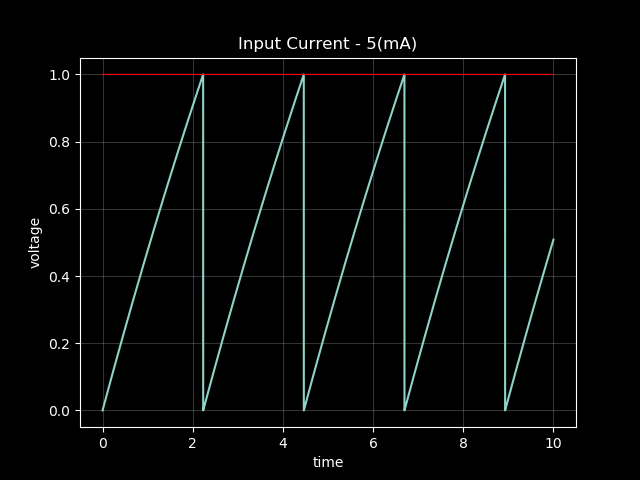

<IPython.core.display.Javascript object>


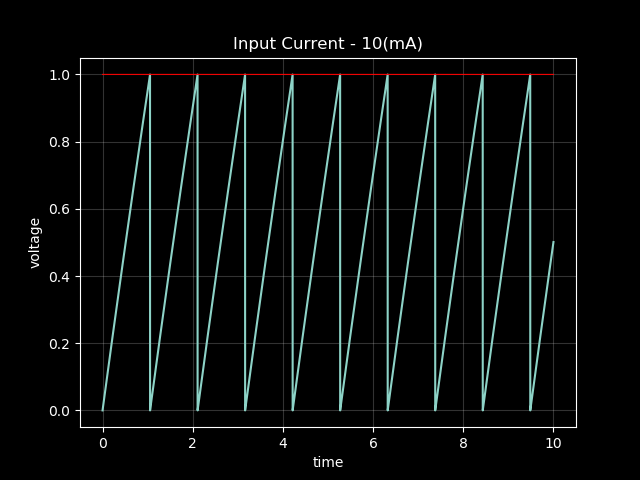

In [14]:
# adapted from lif_mod.py
Is = [1.1, 2, 5, 10]
T = 10      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array (mV)
tvec = np.linspace(0,T,nt)     # time vector (ms)

u = np.zeros(nt)   # vector of voltage entries
spike_times = []             # initialize vector of spike times

for I in Is:
    spike_times_local = []
    for j in np.arange(nt-1):
        u[j+1] = u[j]+dt*(R*I-u[j])/taum
        if u[j+1]>uth:
            u[j+1]=urest;                   # reset the voltage to resting potential
            spike_times_local.append(tvec[j+1])    # add on another spike time

    spike_times.append(spike_times_local)

    plt.figure()
    plt.grid(True, alpha=0.2)
    plt.plot(tvec,u)
    plt.plot(tvec, [uth]*len(tvec), 'r', linewidth=0.75) # horizontal line for uth
    plt.xlabel('time')
    plt.ylabel('voltage')
    plt.title('Input Current - %s(mA)'%I)
    plt.show()

In [7]:
time_pts = []
for times in spike_times:
    if len(times) > 1:
        time_pts.append(np.mean(np.diff(times)))
    elif len(times) == 1:
        time_pts.append(times[0])
    else:
        time_pts.append(None)


<IPython.core.display.Javascript object>


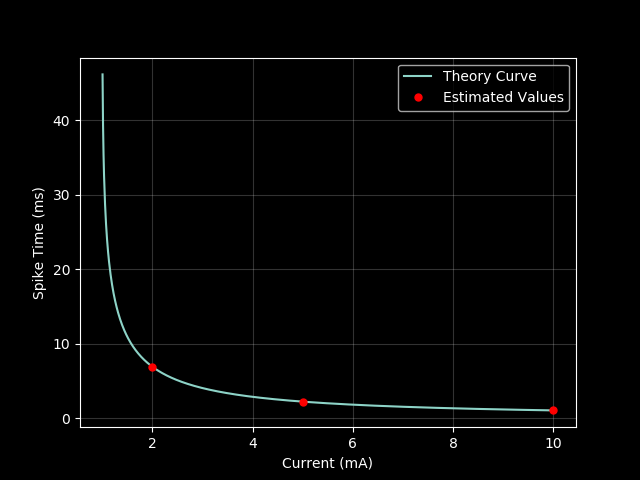

In [11]:
plt.figure()
plt.grid(True, alpha=0.2)
plt.plot(currents, input_times)
plt.plot(Is, time_pts, 'r.', markersize=10)
plt.xlabel('Current (mA)')
plt.ylabel('Spike Time (ms)')
plt.legend(['Theory Curve', 'Estimated Values'])

<IPython.core.display.Javascript object>


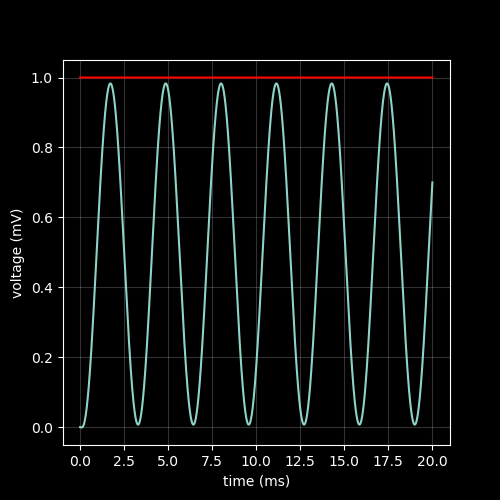

In [28]:
# adapted from lif_per.py
taum = 0.1  # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
uth = 1     # spiking threshold (mV)
A = 1.5     # current modulation amplitude (mA)

T = 20      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)

u = np.zeros(nt);   # vector of voltage entries
st = 0              # initialize vector to store spike times

for j in np.arange(nt-1):
    A = (uth - urest) / (R*((taum**2 + 1) / (np.sin(tvec[j]) - taum*np.cos(tvec[j]))))
    I = A*np.sin(tvec[j])               # 
    u[j+1] = u[j]+dt*(R*I-u[j])/taum    # update the voltage
    if u[j+1]>=uth:
        u[j+1]=urest                    # reset the spike voltage
        st = np.append(st,tvec[j+1])    # add spike time to vector
 


plt.figure(figsize=(5,5))
plt.grid(True, alpha=0.2)
plt.plot(tvec,u)
plt.plot(tvec, [uth]*len(tvec), 'r')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

In [24]:
A

0.8630071603704408